In [4]:
import torch
from torch import nn

## Tensor

In [5]:
rand = torch.rand(3, 4, 4)
rand

tensor([[[0.8302, 0.0171, 0.9891, 0.8871],
         [0.1865, 0.1717, 0.1255, 0.9964],
         [0.9422, 0.7378, 0.8651, 0.9422],
         [0.5049, 0.5671, 0.0518, 0.6213]],

        [[0.7449, 0.2164, 0.7626, 0.2122],
         [0.9726, 0.5818, 0.3008, 0.7082],
         [0.6248, 0.7772, 0.6189, 0.3118],
         [0.5945, 0.8517, 0.5091, 0.0394]],

        [[0.9922, 0.7278, 0.6977, 0.5920],
         [0.5630, 0.1698, 0.8212, 0.1437],
         [0.1219, 0.1386, 0.0315, 0.0413],
         [0.1449, 0.4876, 0.1249, 0.6546]]])

## Autograd

In [3]:
x = torch.ones(1, requires_grad=True)
y = x + 2
print(y)
z = y * y * 3
print(z)
z.backward()
x.grad

tensor([3.], grad_fn=<AddBackward0>)
tensor([27.], grad_fn=<MulBackward0>)


tensor([18.])

## Linear Regression

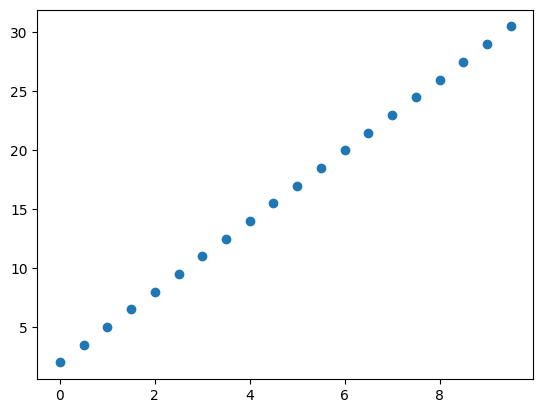

In [6]:
import numpy as np
import matplotlib.pyplot as plt

X = np.arange(0, 10, 0.5)
y = 2 + 3 * X

plt.scatter(X, y)
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression

X, y = X.reshape(-1, 1), y.reshape(-1, 1)

model = LinearRegression()
model.fit(X, y)

print(model.coef_, model.intercept_)

[[3.]] [2.]


## Gradient Descent

In [6]:
torch.seed()


class SGDRegressor(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, 1)

    def forward(self, x):
        y = self.fc1(x)
        return y


model = SGDRegressor()
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

X_train = torch.tensor(X, dtype=torch.float32)
y_train = torch.tensor(y, dtype=torch.float32)

In [7]:
for name, param in model.named_parameters():
    print(name, param)

fc1.weight Parameter containing:
tensor([[0.8434]], requires_grad=True)
fc1.bias Parameter containing:
tensor([0.9557], requires_grad=True)


In [10]:
EPOCH = 5000

for epoch in range(EPOCH):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

In [11]:
for name, param in model.named_parameters():
    print(name, param)

fc1.weight Parameter containing:
tensor([[3.0000]], requires_grad=True)
fc1.bias Parameter containing:
tensor([2.0000], requires_grad=True)


## Logistic Regression

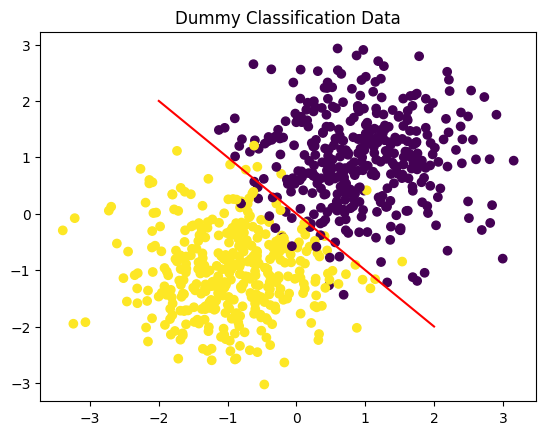

In [8]:
from sklearn.datasets import make_blobs

centers = [[1, 1], [-1, -1]]

X, y = make_blobs(n_samples=750, centers=centers, cluster_std=0.8, random_state=0)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Dummy Classification Data")
plt.plot([-2, 2], [2, -2], "r")
plt.show()

In [13]:
y = y.reshape(-1, 1)

In [14]:
torch.seed()


class LogisticRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2, 1)

    def forward(self, x):
        z = self.fc1(x)
        y = torch.sigmoid(z)
        return y


model = LogisticRegression()
loss_fn = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

X_train = torch.tensor(X, dtype=torch.float32)
y_train = torch.tensor(y, dtype=torch.float32)

model(X_train)

tensor([[0.4313],
        [0.4642],
        [0.4572],
        [0.4637],
        [0.4535],
        [0.3853],
        [0.4788],
        [0.4353],
        [0.5350],
        [0.4857],
        [0.4597],
        [0.5115],
        [0.4907],
        [0.5128],
        [0.5559],
        [0.3925],
        [0.5582],
        [0.4847],
        [0.3432],
        [0.4918],
        [0.4857],
        [0.4586],
        [0.4851],
        [0.5231],
        [0.4695],
        [0.4427],
        [0.4855],
        [0.4438],
        [0.3998],
        [0.4727],
        [0.4539],
        [0.4530],
        [0.4747],
        [0.4457],
        [0.4899],
        [0.5040],
        [0.4715],
        [0.4004],
        [0.4409],
        [0.3517],
        [0.4540],
        [0.4681],
        [0.4506],
        [0.4959],
        [0.3817],
        [0.4705],
        [0.4752],
        [0.4482],
        [0.3725],
        [0.4341],
        [0.4986],
        [0.4580],
        [0.3757],
        [0.4301],
        [0.4969],
        [0

In [15]:
EPOCH = 5000

for epoch in range(EPOCH):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

In [16]:
with torch.inference_mode():
    y_final_pred = model(X_train)

torch.mean(((y_final_pred > 0.5).int() == y_train).float())

tensor(0.9693)

## Mnist

In [9]:
import torchvision
from torchvision import transforms

train = torchvision.datasets.MNIST(
    "./data",
    train=True,
    download=True,
    transform=transforms.Compose(
        [  ### CONVERT ARRAY TO TENSOR
            transforms.ToTensor()
        ]
    ),
)

test = torchvision.datasets.MNIST(
    "./data", train=False, download=True, transform=transforms.Compose([transforms.ToTensor()])
)


print(train)

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )


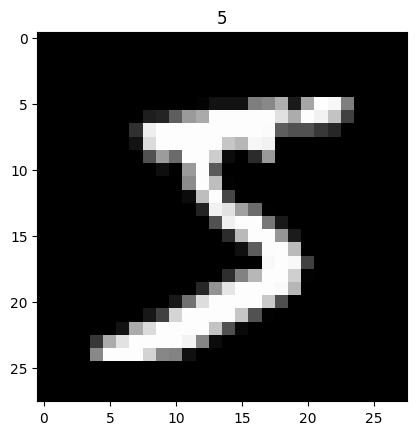

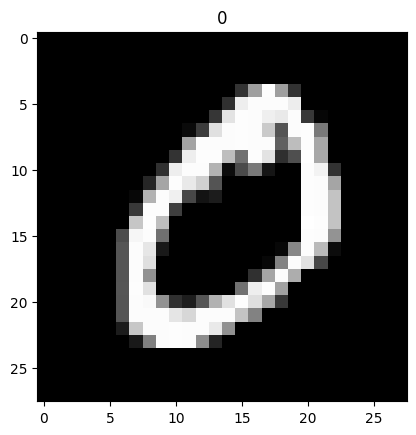

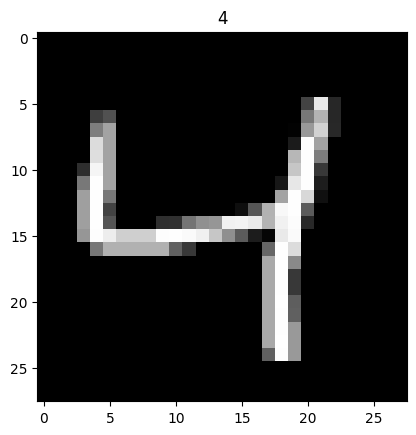

In [18]:
counter = 0

for image, label in train:
    image = image.squeeze()
    plt.imshow(image, cmap="gray")
    plt.title(label)
    plt.show()

    counter += 1

    if counter == 3:
        break

In [10]:
BATCH_SIZE = 32
loss_fn = torch.nn.CrossEntropyLoss()
LR = 0.008
EPOCHS = 50

In [11]:
trainset = torch.utils.data.DataLoader(train, batch_size=BATCH_SIZE, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=BATCH_SIZE, shuffle=True)

for images, labels in trainset:
    print(images.shape)
    print(labels)
    break

torch.Size([32, 1, 28, 28])
tensor([9, 8, 0, 0, 3, 0, 8, 6, 3, 8, 4, 7, 8, 9, 7, 7, 8, 9, 5, 0, 6, 6, 4, 6,
        8, 8, 1, 1, 6, 0, 4, 8])


In [21]:
class FCNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28 * 28, 10)

    def forward(self, x):
        batch_size = x.shape[0]
        x = x.reshape(batch_size, -1)

        logits = self.fc1(x)
        return logits

In [22]:
model = FCNet()
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

for epoch in range(EPOCHS):
    print(f"Training epoch {epoch + 1}")

    losses = []
    for images, labels in trainset:
        optimizer.zero_grad()
        forward_out = model(images)
        loss = loss_fn(forward_out, labels)
        losses.append(loss.item())

        loss.backward()
        optimizer.step()

    print(f"loss: {np.mean(losses)})")

Training epoch 1
loss: 0.3591049043238163)
Training epoch 2
loss: 0.31723568588693934)
Training epoch 3
loss: 0.30735139201978845)
Training epoch 4
loss: 0.3059583529452483)
Training epoch 5
loss: 0.3050806891689698)
Training epoch 6
loss: 0.30155402843281626)
Training epoch 7
loss: 0.29949909228583177)
Training epoch 8
loss: 0.3000548667187492)
Training epoch 9
loss: 0.29945458508779604)
Training epoch 10
loss: 0.2955577469959855)
Training epoch 11
loss: 0.2943635236139099)
Training epoch 12
loss: 0.29363760237395764)
Training epoch 13
loss: 0.2933522292926908)
Training epoch 14
loss: 0.2935120943325261)
Training epoch 15
loss: 0.2926528602922956)
Training epoch 16
loss: 0.2894638972242673)
Training epoch 17
loss: 0.2894326475843787)
Training epoch 18
loss: 0.2891778653435409)
Training epoch 19
loss: 0.2896304449742039)
Training epoch 20
loss: 0.29113632961859304)
Training epoch 21
loss: 0.2881333628455798)
Training epoch 22
loss: 0.28758664294878644)
Training epoch 23
loss: 0.2886852

In [23]:
correct = 0
total = 0

model.eval()

with torch.inference_mode():
    for images, labels in testset:
        forward_out = model(images)

        for idx, i in enumerate(forward_out):
            prediction = torch.argmax(i)
            if prediction == labels[idx]:
                correct += 1
            total += 1


print("Accuracy: ", round(correct / total, 2))

Accuracy:  0.91


## Deeper Network

In [12]:
import torch.nn.functional as F


class FCNet(nn.Module):  # Inherit in nn.Module Class
    def __init__(self):
        super().__init__()  # initialize the nn.Module Class
        self.fc1 = nn.Linear(28 * 28, 64)  # input flattened 28*28 into 64 node layer
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)  # Output to 10 neurons as we have 10 options

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # reshape to flaten our batch*28*28 to be batch*784
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [25]:
import time

# Declare Model
model = FCNet()
# Declare Optimizer (Adam)
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

start = time.time()
for epoch in range(1, EPOCHS + 1):
    print("Epoch {}".format(epoch))
    losses = []
    for data in trainset:
        X, y = data
        optimizer.zero_grad()  # We want to zero the gradient before every forward pass
        forward_out = model(X)  # Forward Pass
        loss_val = loss_fn(forward_out, y)
        losses.append(loss_val.item())
        loss_val.backward()  # Calculate Gradients
        optimizer.step()  # Take a step towards optimizing

    print(f"Loss: {np.mean(losses)}")

print("Time On CPU for Model Training: {}".format(time.time() - start))


Epoch 1
Loss: 0.29341282141854363
Epoch 2
Loss: 0.182741318853572
Epoch 3
Loss: 0.15683523680275926
Epoch 4
Loss: 0.14465566375001024
Epoch 5
Loss: 0.13341935472527208
Epoch 6
Loss: 0.1272926141285027
Epoch 7
Loss: 0.11657318150748809
Epoch 8
Loss: 0.11561518933794772
Epoch 9
Loss: 0.1054493236605078
Epoch 10
Loss: 0.1033177686664043
Epoch 11
Loss: 0.10290332080411414
Epoch 12
Loss: 0.08706046171956908
Epoch 13
Loss: 0.09877081998959572
Epoch 14
Loss: 0.0983128585932466
Epoch 15
Loss: 0.0817454362253445
Epoch 16
Loss: 0.08402453113953816
Epoch 17
Loss: 0.08693051746737153
Epoch 18
Loss: 0.0779931095099814
Epoch 19
Loss: 0.09465728029625219
Epoch 20
Loss: 0.0751150292924974
Epoch 21
Loss: 0.06998961754339107
Epoch 22
Loss: 0.08222418451384778
Epoch 23
Loss: 0.08305305342635572
Epoch 24
Loss: 0.08038237414899341
Epoch 25
Loss: 0.08201117075346846
Epoch 26
Loss: 0.0678781396820855
Epoch 27
Loss: 0.08836718300755601
Epoch 28
Loss: 0.0695601257548362
Epoch 29
Loss: 0.06821330676566213
Epoch

In [26]:
correct = 0
total = 0

model.eval()

with torch.inference_mode():
    for images, labels in testset:
        forward_out = model(images)

        for idx, i in enumerate(forward_out):
            prediction = torch.argmax(i)
            if prediction == labels[idx]:
                correct += 1
            total += 1


print("Accuracy: ", round(correct / total, 2))

Accuracy:  0.97


## GPU

In [13]:
DEVICE = "mps:0"

In [16]:
import time

model = FCNet().to(DEVICE)
# Declare Optimizer (Adam)
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

start = time.time()
for epoch in range(1, EPOCHS + 1):
    print("Epoch {}".format(epoch))
    losses = []
    for data in trainset:
        X, y = data
        X, y = X.to(DEVICE), y.to(DEVICE)
        optimizer.zero_grad()  # We want to zero the gradient before every forward pass
        forward_out = model(X)  # Forward Pass
        loss_val = loss_fn(forward_out, y)
        losses.append(loss_val.item())
        loss_val.backward()  # Calculate Gradients
        optimizer.step()  # Take a step towards optimizing

    print(f"Loss: {np.mean(losses)}")

print("Time On GPU for Model Training: {}".format(time.time() - start))

Epoch 1
Loss: 0.28383019009480875
Epoch 2
Loss: 0.17733762596069524
Epoch 3
Loss: 0.15401346929588666
Epoch 4
Loss: 0.14013687110375614
Epoch 5
Loss: 0.12851020866290977
Epoch 6
Loss: 0.12217904142462649
Epoch 7
Loss: 0.11718401676012824
Epoch 8
Loss: 0.11269351674928718
Epoch 9
Loss: 0.11328911259161153
Epoch 10
Loss: 0.10592510821647787
Epoch 11
Loss: 0.09990018833221208
Epoch 12
Loss: 0.10826664330395579
Epoch 13
Loss: 0.09854155217176304
Epoch 14
Loss: 0.09437452224025425
Epoch 15
Loss: 0.09214670813890213
Epoch 16
Loss: 0.08825383937992252
Epoch 17
Loss: 0.08315972745512651
Epoch 18
Loss: 0.08476338297311983
Epoch 19
Loss: 0.082798497272968
Epoch 20
Loss: 0.07744638547419297
Epoch 21
Loss: 0.08638442238198574
Epoch 22
Loss: 0.08045985816812753
Epoch 23
Loss: 0.0795732801332769
Epoch 24
Loss: 0.08618248470236431
Epoch 25
Loss: 0.07285302039219872
Epoch 26
Loss: 0.08171215897850938
Epoch 27
Loss: 0.0875464619736403
Epoch 28
Loss: 0.07041575594831319
Epoch 29
Loss: 0.1155057114734168

## Validation loop

In [18]:
model = FCNet().to(DEVICE)
# Declare Optimizer (Adam)
optimizer = torch.optim.Adam(model.parameters(), lr=LR)
EPOCHS = 20
training_avg_losses = []
validation_avg_losses = []
for epoch in range(EPOCHS):
    print("Epoch {}".format(epoch))
    training_losses = []
    validation_losses = []

    model.train()  # Set to training mode
    for data in trainset:
        X, y = data
        X, y = X.to(DEVICE), y.to(DEVICE)
        optimizer.zero_grad()
        forward_out = model(X)
        loss_val = loss_fn(forward_out, y)
        training_losses.append(loss_val.item())
        loss_val.backward()
        optimizer.step()

    model.eval()  # Set to evaluation mode
    for data in testset:
        with torch.no_grad():  # Wrap with a no grad so computational graph isnt built
            X, y = data
            X, y = X.to(DEVICE), y.to(DEVICE)
            forward_out = model(X)
            loss_val = loss_fn(forward_out, y)
            validation_losses.append(loss_val.item())

    training_loss_avg = np.mean(training_losses)
    validation_loss_avg = np.mean(validation_losses)

    training_avg_losses.append(training_loss_avg)
    validation_avg_losses.append(validation_loss_avg)
    print(f"Training Loss: {training_loss_avg}")
    print(f"Validation Loss: {validation_loss_avg}")

Epoch 0
Training Loss: 0.2998483190671851
Validation Loss: 0.22276826013926976
Epoch 1
Training Loss: 0.18564518842150768
Validation Loss: 0.17616399535730767
Epoch 2
Training Loss: 0.16786765015100438
Validation Loss: 0.15127941073340992
Epoch 3
Training Loss: 0.14217012017794575
Validation Loss: 0.15930412436434524
Epoch 4
Training Loss: 0.13361028101284367
Validation Loss: 0.15640206569110224
Epoch 5
Training Loss: 0.12508113969170953
Validation Loss: 0.15137427316542668
Epoch 6
Training Loss: 0.11539565766719946
Validation Loss: 0.16035162572726272
Epoch 7
Training Loss: 0.1149857093075756
Validation Loss: 0.16183251029471107
Epoch 8
Training Loss: 0.11571445788678247
Validation Loss: 0.24050837755984308
Epoch 9
Training Loss: 0.10030030262535729
Validation Loss: 0.16720461880843254
Epoch 10
Training Loss: 0.11327040589616712
Validation Loss: 0.1626762826743829
Epoch 11
Training Loss: 0.10938459233321288
Validation Loss: 0.16963096301582012
Epoch 12
Training Loss: 0.095233540906826

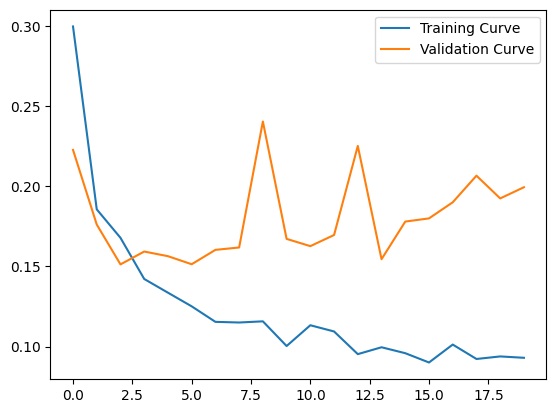

In [19]:
x = list(range(20))
plt.plot(x, training_avg_losses, label="Training Curve")
plt.plot(x, validation_avg_losses, label="Validation Curve")
plt.legend()
plt.show()